In [1]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<AxesSubplot:>

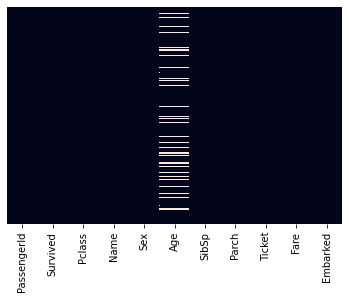

In [3]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

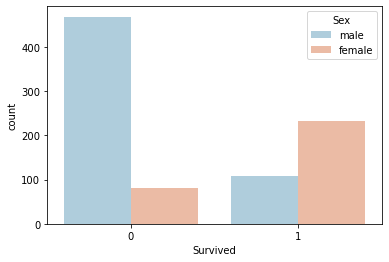

In [4]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

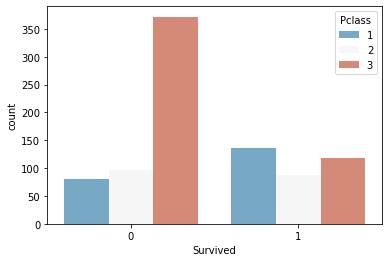

In [5]:
#艙等是否也影響存活? 第一艙存活率較高
sns.countplot(x='Survived',hue='Pclass',data=train,palette='RdBu_r')

/Users/huangyuting/opt/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

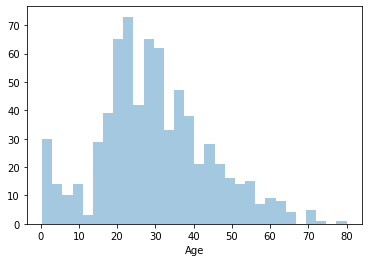

In [6]:
#用直方圖看年齡分佈。缺失資料在此不計。
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

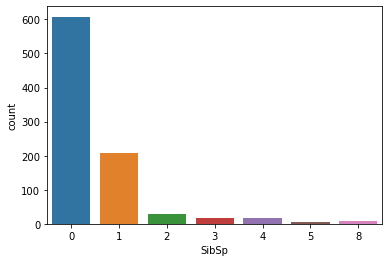

In [7]:
#SibSp代表兄弟姐妹或眷屬人數: 大部分的人都是自己來
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

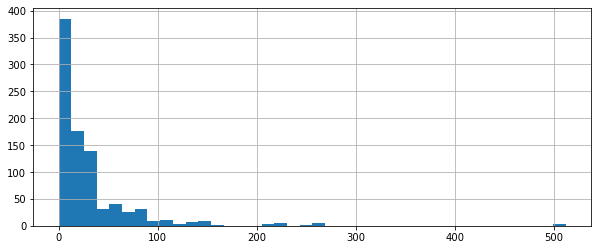

In [8]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

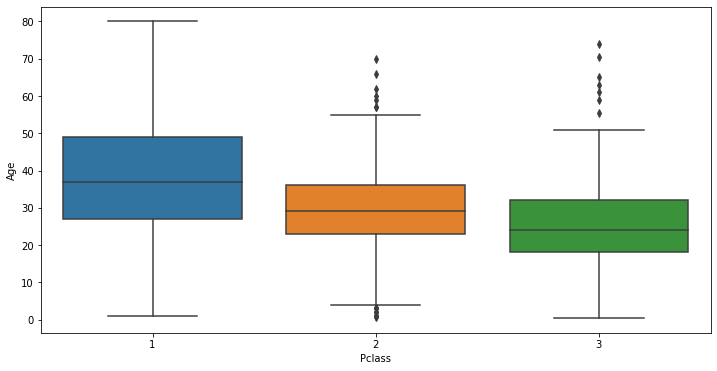

In [9]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train)

In [10]:
mean_age_pclass = train[['Pclass', 'Age']].groupby('Pclass').mean().reset_index( )
mean_age_pclass_dict = {}
for index, value in enumerate(mean_age_pclass['Age']):
    mean_age_pclass_dict[mean_age_pclass['Pclass'][index]] = value
mean_age_pclass_dict

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

In [11]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return mean_age_pclass_dict[Pclass]
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

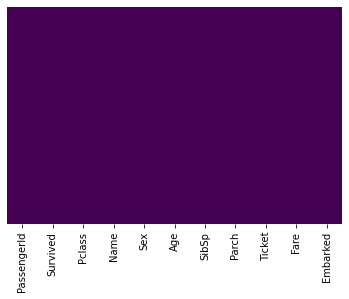

In [12]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作

In [14]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。
sex = pd.get_dummies(train['Sex'],drop_first=True)
#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [15]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [16]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [17]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('PassengerId',axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [19]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)
X = train.drop('Survived',axis=1)
y = train['Survived']

In [20]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [28]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [30]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/huangyuting/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
#使用模型進行測試集資料的預測
predictions = logmodel.predict(X_test)
predictions2 = logmodel.predict(X_train)

In [32]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 0 0 1]
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0
 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [33]:
error_index2=np.where(predictions2!=y_train.values)[0]
print('train accuracy:',1-len(error_index2)/len(X_train))
error_index=np.where(predictions!=y_test.values)[0]
print('test accuracy:',1-len(error_index)/len(X_test))

train accuracy: 0.8022508038585209
test accuracy: 0.797752808988764


In [37]:
print('error_index:',error_index)
print('miss classification :',predictions[error_index])#錯誤答案
data_index=X_test.iloc[error_index].index#這裡變數train是所有資料
train.iloc[data_index]#錯誤欄位的正確之原始資料

error_index: [  5  23  25  33  41  44  46  56  60  61  71  72  73  74  78  79  90  91
  95  98 102 104 108 120 126 128 138 143 145 149 156 160 162 170 172 174
 175 176 179 183 187 190 198 200 201 205 213 219 226 230 235 244 248 260]
miss classification : [0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
805,0,3,31.000000,0,0,7.7750,1,0,1
296,0,3,23.500000,0,0,7.2292,1,0,0
30,0,1,40.000000,0,0,27.7208,1,0,0
584,0,3,25.140620,0,0,8.7125,1,0,0
730,1,1,29.000000,0,0,211.3375,0,0,1
448,1,3,5.000000,2,1,19.2583,0,0,0
313,0,3,28.000000,0,0,7.8958,1,0,1
363,0,3,35.000000,0,0,7.0500,1,0,1
69,0,3,26.000000,2,0,8.6625,1,0,1
424,0,3,18.000000,1,1,20.2125,1,0,1


In [38]:
print('error_index:',error_index2)
print('miss classification :',predictions2[error_index])#錯誤答案
data_index2=X_train.iloc[error_index2].index#這裡變數train是所有資料
train.iloc[data_index2]#錯誤欄位的正確之原始資料

error_index: [  1  17  30  32  34  35  43  51  53  65  69  70  74  76  77  80  84  85
  89  92 103 116 124 133 141 148 153 157 170 181 183 190 192 193 194 197
 198 211 228 229 232 244 245 251 252 259 261 263 264 267 269 282 283 293
 295 302 310 321 332 336 340 343 344 347 348 352 357 358 361 363 365 366
 368 372 396 397 406 411 412 416 430 431 437 447 449 459 461 463 470 473
 476 480 486 487 498 501 503 508 510 511 520 525 536 539 542 546 548 550
 552 555 567 571 574 586 588 590 596 603 605 606 615 617 618]
miss classification : [0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
294,0,3,24.000000,0,0,7.8958,1,0,1
166,1,1,38.233441,0,1,55.0000,0,0,1
75,0,3,25.000000,0,0,7.6500,1,0,1
329,1,1,16.000000,0,1,57.9792,0,0,0
147,0,3,9.000000,2,2,34.3750,0,0,1
...,...,...,...,...,...,...,...,...,...
101,0,3,25.140620,0,0,7.8958,1,0,1
374,0,3,3.000000,3,1,21.0750,0,0,1
702,0,3,18.000000,0,1,14.4542,0,0,0
108,0,3,38.000000,0,0,7.8958,1,0,1
